In [31]:
# Problem Statement 1: (Keep the relevant data)
import pandas as pd

# Read the census data
census_data = pd.read_csv("census_2011.csv")

# Select only the required columns
required_columns = [
    'State name', 'District name', 'Population', 'Male', 'Female',
    'Literate', 'Male_Literate', 'Female_Literate',
    'Rural_Households', 'Urban_Households', 'Households',
    'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50', 'Age not stated'
]
cleaned_data = census_data[required_columns]


In [32]:
# Problem Statement 2: (Rename the Column names)
cleaned_data.rename(columns={
    'State name': 'State/UT',
    'District name': 'District',
    'Male_Literate': 'Literate_Male',
    'Female_Literate': 'Literate_Female',
    'Rural_Households': 'Households_Rural',
    'Urban_Households': 'Households_Urban',
    'Age_Group_0_29': 'Young_and_Adult',
    'Age_Group_30_49': 'Middle_Aged',
    'Age_Group_50': 'Senior_Citizen',
    'Age not stated': 'Age_Not_Stated'
}, inplace=True)

In [33]:
# Problem Statement 3: (Rename State/UT Names)
cleaned_data['State/UT'] = cleaned_data['State/UT'].apply(lambda x: ' '.join(word.capitalize() if word != 'and' else word for word in x.lower().split()))


In [34]:
# Problem Statement 4: (New State/UT formation)
telangana_districts = pd.read_csv("Telangana.txt", header=None)[0].tolist()
ladakh_districts = ['Leh', 'Kargil']

cleaned_data.loc[cleaned_data['District'].isin(telangana_districts), 'State/UT'] = 'Telangana'
cleaned_data.loc[cleaned_data['District'].isin(ladakh_districts), 'State/UT'] = 'Ladakh'


/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_8967/3518843940.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['Population'].fillna(cleaned_data['Male'] + cleaned_data['Female'], inplace=True)
/var/folders/6w/pgggx3ps78qg7z7n94y9fl1m0000gn/T/ipykernel_8967/3518843940.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

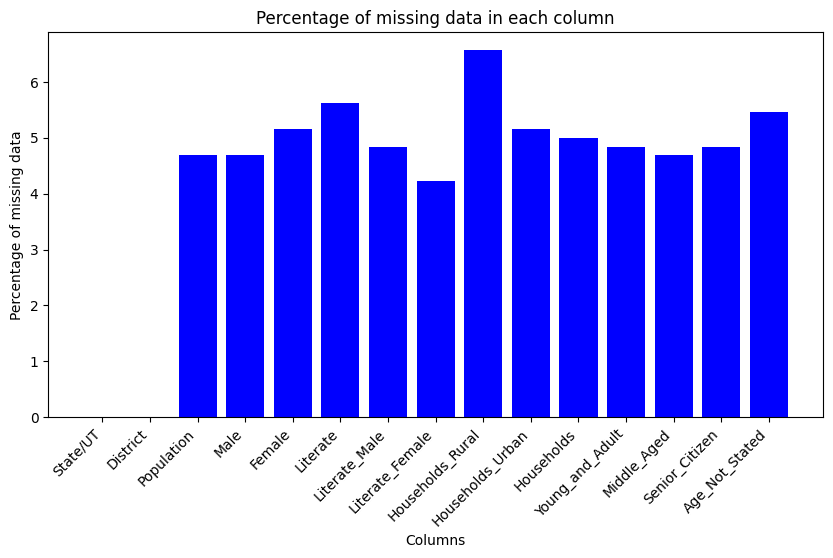

In [35]:
# Problem Statement 5: Find and process Missing Data
# Find and store the percentage of data missing for each column.
missing_percentage = (cleaned_data.isnull().sum() / len(cleaned_data)) * 100

# Some data can be found and filled in by using information from other cells.
# Fill missing values for Population, Literate, Households, and Age groups based on existing data
cleaned_data['Population'].fillna(cleaned_data['Male'] + cleaned_data['Female'], inplace=True)
cleaned_data['Literate'].fillna(cleaned_data['Literate_Male'] + cleaned_data['Literate_Female'], inplace=True)
cleaned_data['Households'].fillna(cleaned_data['Households_Rural'] + cleaned_data['Households_Urban'], inplace=True)
cleaned_data['Age_Not_Stated'].fillna(cleaned_data['Population'] - (cleaned_data['Young_and_Adult'] + cleaned_data['Middle_Aged'] + cleaned_data['Senior_Citizen']), inplace=True)

# Create a visualization that compares the amount of missing data before and after the data-filling process was done.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(missing_percentage.index, missing_percentage, color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing data')
plt.title('Percentage of missing data in each column')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
# Problem Statement 6: Save Data
cleaned_data.to_csv("/Users/arunjayesh/Documents/Studies/College/2nd yr/term 10/projects/Project day 1/census.csv", index=False)


In [37]:
# Problem Statement 7: Process the relevant data
housing_data = pd.read_csv("/Users/arunjayesh/Documents/Studies/College/2nd yr/term 10/projects/Project day 1/housing.csv")

# Merge the cleaned census data with the housing data
merged_data = pd.merge(cleaned_data, housing_data, on='District')

# Calculate additional columns
merged_data['Households_Rural_Dilapidated'] = (merged_data['Households_Rural_y'] * merged_data['Households_Rural_Dilapidated']) / 100
merged_data['Households_Urban_Dilapidated'] = (merged_data['Households_Urban_y'] * merged_data['Households_Urban_Dilapidated']) / 100
merged_data['Households_Rural_Toilet_Premise'] = (merged_data['Households_Rural_y'] * merged_data['Households_Rural_Toilet_Premise']) / 100
merged_data['Households_Urban_Toilet_Premise'] = (merged_data['Households_Urban_y'] * merged_data['Households_Urban_Toilet_Premise']) / 100

# Select required columns
processed_housing_data = merged_data[[
    'District', 'Households_Rural_y', 'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
    'Households_Urban_y', 'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise'
]]

# Save processed housing data
processed_housing_data.to_csv("/Users/arunjayesh/Documents/Studies/College/2nd yr/term 10/projects/Project day 1/housing.csv", index=False)

# Check for missing data
missing_in_housing = set(cleaned_data['District']) - set(housing_data['District'])
missing_in_census = set(housing_data['District']) - set(cleaned_data['District'])
print("Districts missing in housing data:", missing_in_housing)
print("Districts missing in census data:", missing_in_census)


Districts missing in housing data: {'Lahul AND Spiti', 'Dadra AND Nagar Haveli', 'PONDICHERRY', 'North  AND Middle Andaman', 'Lakshadweep'}
Districts missing in census data: set()


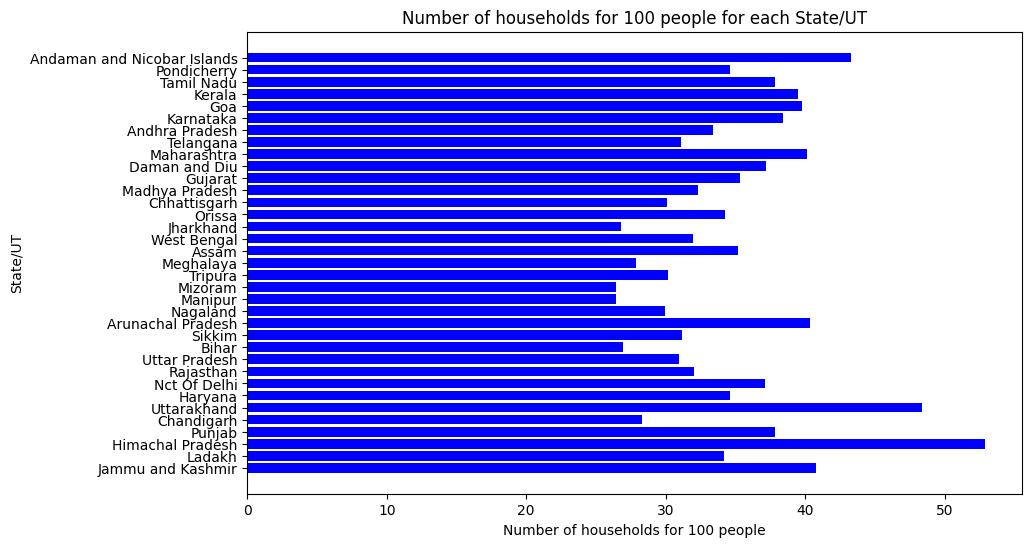

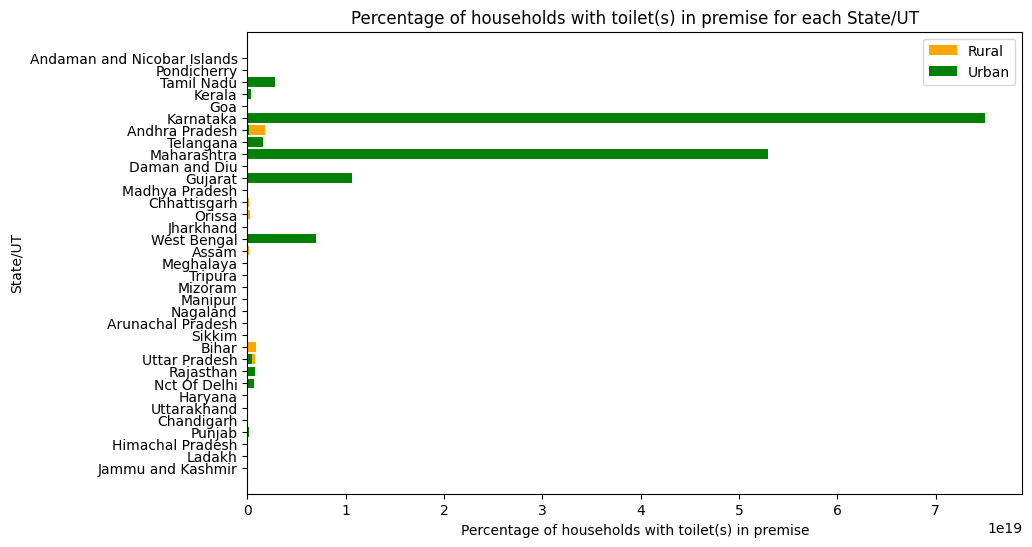

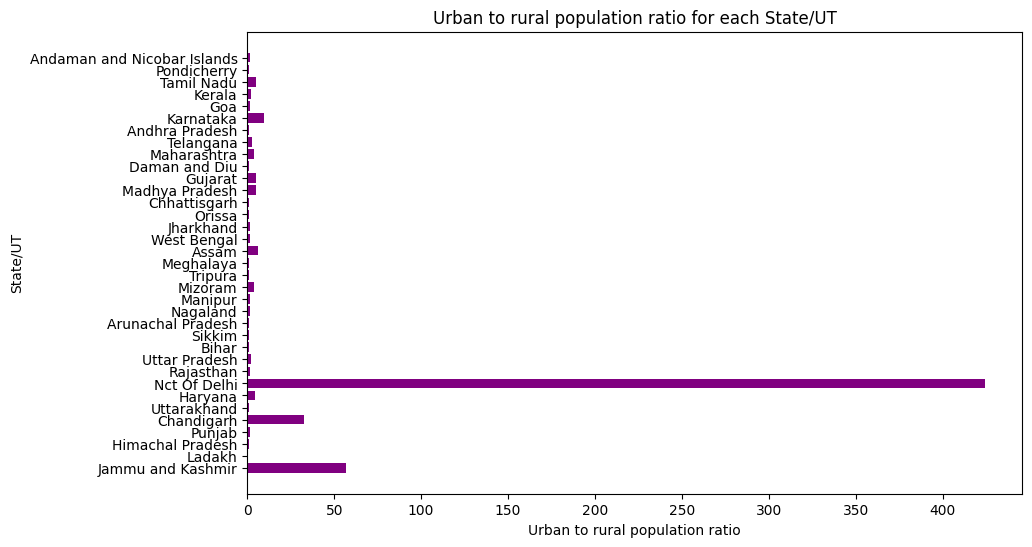

In [38]:
# Problem Statement 8: Visualise the housing data
import matplotlib.pyplot as plt

# Visualize the number of households for 100 people for each State/UT
plt.figure(figsize=(10, 6))
plt.barh(merged_data['State/UT'], merged_data['Households'] / (merged_data['Population'] / 100), color='blue')
plt.xlabel('Number of households for 100 people')
plt.ylabel('State/UT')
plt.title('Number of households for 100 people for each State/UT')
plt.show()

# Visualize the percentage of households with toilet(s) in premise for each State/UT
plt.figure(figsize=(10, 6))
plt.barh(merged_data['State/UT'], merged_data['Households_Rural_Toilet_Premise'] / merged_data['Households_Rural_y'] * 100, color='orange', label='Rural')
plt.barh(merged_data['State/UT'], merged_data['Households_Urban_Toilet_Premise'] / merged_data['Households_Urban_y'] * 100, color='green', label='Urban')
plt.xlabel('Percentage of households with toilet(s) in premise')
plt.ylabel('State/UT')
plt.title('Percentage of households with toilet(s) in premise for each State/UT')
plt.legend()
plt.show()

# Visualize the urban to rural population ratio for each State/UT
plt.figure(figsize=(10, 6))
plt.barh(merged_data['State/UT'], merged_data['Households_Urban_y'] / merged_data['Households_Rural_y'], color='purple')
plt.xlabel('Urban to rural population ratio')
plt.ylabel('State/UT')
plt.title('Urban to rural population ratio for each State/UT')
plt.show()


In [39]:
# Problem Statement 9: Inconsistency in different datasets

# Calculate the difference between 'Households_Rural' and 'Households_Urban' from census data
cleaned_data['Households_Difference'] = cleaned_data['Households_Rural'] - cleaned_data['Households_Urban']

# Calculate the difference between 'Households_Rural' and 'Households_Urban' from housing data
housing_data['Households_Difference'] = housing_data['Households_Rural_y'] - housing_data['Households_Urban_y']

# Find districts where the difference in 'Households_Rural' and 'Households_Urban' is more than 10%
major_difference_districts = cleaned_data[abs(cleaned_data['Households_Difference']) > 0.1 * cleaned_data['Households']].copy()

# Display districts with major differences
print("Districts with major differences in 'Households_Rural' and 'Households_Urban':")
print(major_difference_districts[['District', 'Households_Rural', 'Households_Urban', 'Households_Difference']])


Districts with major differences in 'Households_Rural' and 'Households_Urban':
                      District  Households_Rural  Households_Urban  \
1                       Badgam          160649.0           27190.0   
2                  Leh(Ladakh)           36920.0           17474.0   
3                       Kargil           40370.0            7774.0   
4                        Punch          132139.0           15269.0   
5                      Rajouri          196070.0           17508.0   
..                         ...               ...               ...   
634                PONDICHERRY           87296.0          203741.0   
635                       Mahe               0.0           12110.0   
637                   Nicobars           15958.0               0.0   
638  North  AND Middle Andaman           39091.0            1094.0   
639              South Andaman           34901.0           50631.0   

     Households_Difference  
1                 133459.0  
2                  194